# SA-2025 WEEK 4 GRADED ASSIGNMENT

> Wine Tasting

Predict the quality of the wine as per the characteristics graded in the features

![](https://img.imageboss.me/reservesanity/width/1920/format:auto/2c784c4e0aaf24783c6084f364d913e3941002c4-2880x1300.webp?auto=format)

In [881]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [882]:
white_wine=pd.read_csv("winequality-white.csv",sep=";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [883]:
red_wine=pd.read_csv("winequality-red.csv",sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [884]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [885]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


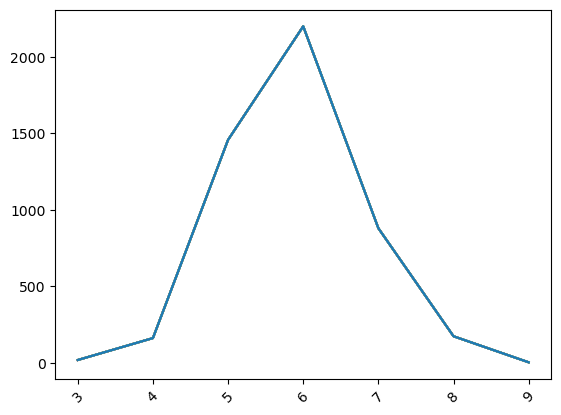

In [886]:
import seaborn

# multiple groupby (pulse and diet both)
plt.plot(white_wine.groupby(['quality']).count())
plt.xticks(rotation=45)
plt.show()

In [887]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [888]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### As there is no missing values, we can directly move onto training our models which we have learnt this week, we will Implement Decision Trees, Random Forest, XGBoost, Catboost, AdaBoost, KNN and simple MultiNomial Logistic Regrression,to classify the quality of red wines,  and white wines seperately, an compare all of them.

In [889]:
y_w=white_wine['quality']
white_wine=white_wine.drop(columns=['quality'])
X_train_W, X_test_w,y_train_w, y_test_w=train_test_split(white_wine,y_w,test_size=0.33,random_state=42)
print(X_train_W.shape,X_test_w.shape,y_train_w.shape,y_test_w.shape)

(3281, 11) (1617, 11) (3281,) (1617,)


In [890]:
y_r=red_wine['quality']
red_wine=red_wine.drop(columns=['quality'])
X_train_r, X_test_r,y_train_r, y_test_r=train_test_split(red_wine,y_r,test_size=0.33,random_state=42)
print(X_train_r.shape[0],X_test_r.shape[0],y_train_r.shape[0],y_test_r.shape[0])

1071 528 1071 528


In [891]:
from sklearn.linear_model import LogisticRegression
logreg1=LogisticRegression(
    multi_class="multinomial",solver='lbfgs'
)
logreg2=LogisticRegression(
    multi_class="multinomial",solver='lbfgs'
)
# For white wine
logreg1.fit(X_train_W,y_train_w)
# For red wine
logreg2.fit(X_train_r,y_train_r)


c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

LogisticRegression(multi_class='multinomial')

In [892]:
y_log_w=logreg1.predict(X_test_w)
y_log_r=logreg2.predict(X_test_r)

In [893]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(f"For White Wine: \nAccuracy Score: {(accuracy_score(y_test_w,y_log_w)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_w,y_log_w)}\nClassification Report: \n{classification_report(y_test_w,y_log_w)}")


For White Wine: 
Accuracy Score: 47.12%
Confusion Matrix: 
[[  1   0   3   3   0   0]
 [  0   0  14  32   0   0]
 [  0   0 147 321   4   0]
 [  0   0 116 610   5   0]
 [  0   0  32 268   4   0]
 [  0   0   2  53   2   0]]
Classification Report: 
              precision    recall  f1-score   support

           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00        46
           5       0.47      0.31      0.37       472
           6       0.47      0.83      0.60       731
           7       0.27      0.01      0.03       304
           8       0.00      0.00      0.00        57

    accuracy                           0.47      1617
   macro avg       0.37      0.22      0.21      1617
weighted avg       0.41      0.47      0.39      1617



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [894]:
print(f"For Red Wine: \nAccuracy Score: {(accuracy_score(y_test_r,y_log_r)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_r,y_log_r)}\nClassification Report: \n{classification_report(y_test_r,y_log_r)}")

For Red Wine: 
Accuracy Score: 55.30%
Confusion Matrix: 
[[  0   0   2   0   0   0]
 [  0   0   9   9   1   0]
 [  0   0 158  59   0   0]
 [  0   0  79 133   1   0]
 [  0   0   5  64   1   0]
 [  0   0   0   6   1   0]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.62      0.73      0.67       217
           6       0.49      0.62      0.55       213
           7       0.25      0.01      0.03        70
           8       0.00      0.00      0.00         7

    accuracy                           0.55       528
   macro avg       0.23      0.23      0.21       528
weighted avg       0.49      0.55      0.50       528



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [895]:
from sklearn.tree import DecisionTreeClassifier

tree_w = DecisionTreeClassifier(random_state=42)
tree_r = DecisionTreeClassifier(random_state=42)

In [896]:
tree_w.fit(X_train_W,y_train_w)
tree_r.fit(X_train_r,y_train_r)

DecisionTreeClassifier(random_state=42)

In [897]:
y_tree_w=tree_w.predict(X_test_w)
y_tree_r=tree_r.predict(X_test_r)

In [898]:
print(f"Decision Tree Classifier For White Wine: \nAccuracy Score: {(accuracy_score(y_test_w,y_tree_w)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_w,y_tree_w)}\nClassification Report: \n{classification_report(y_test_w,y_tree_w)}")

Decision Tree Classifier For White Wine: 
Accuracy Score: 57.45%
Confusion Matrix: 
[[  0   0   3   3   1   0   0]
 [  1  16  19   8   2   0   0]
 [  1  12 299 138  20   2   0]
 [  2  16 163 437  96  17   0]
 [  2   4  28 100 153  15   2]
 [  0   1   2  15  15  24   0]
 [  0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.33      0.35      0.34        46
           5       0.58      0.63      0.61       472
           6       0.62      0.60      0.61       731
           7       0.53      0.50      0.52       304
           8       0.41      0.42      0.42        57
           9       0.00      0.00      0.00         0

    accuracy                           0.57      1617
   macro avg       0.35      0.36      0.36      1617
weighted avg       0.58      0.57      0.57      1617



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [899]:
print(f"Decision Tree Classifier For Red Wine: \nAccuracy Score: {(accuracy_score(y_test_r,y_tree_r)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_r,y_tree_r)}\nClassification Report: \n{classification_report(y_test_r,y_tree_r)}")

Decision Tree Classifier For Red Wine: 
Accuracy Score: 55.11%
Confusion Matrix: 
[[  0   2   0   0   0   0]
 [  0   1  10   6   2   0]
 [  0   7 138  63   8   1]
 [  0   6  51 119  34   3]
 [  0   1   9  24  32   4]
 [  0   0   0   3   3   1]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.05      0.06        19
           5       0.66      0.64      0.65       217
           6       0.55      0.56      0.56       213
           7       0.41      0.46      0.43        70
           8       0.11      0.14      0.12         7

    accuracy                           0.55       528
   macro avg       0.30      0.31      0.30       528
weighted avg       0.55      0.55      0.55       528



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [900]:
from sklearn.ensemble import RandomForestClassifier

rf_w = RandomForestClassifier(n_estimators=100)
rf_r = RandomForestClassifier(n_estimators=100)

In [901]:
rf_w.fit(X_train_W,y_train_w)
rf_r.fit(X_train_r,y_train_r)

RandomForestClassifier()

In [902]:
y_forest_w=rf_w.predict(X_test_w)
y_forest_r=rf_r.predict(X_test_r)

In [903]:
print(f"Randome Forest Classifier For White Wine: \nAccuracy Score: {(accuracy_score(y_test_w,y_forest_w)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_w,y_forest_w)}\nClassification Report: \n{classification_report(y_test_w,y_forest_w)}")

Randome Forest Classifier For White Wine: 
Accuracy Score: 66.48%
Confusion Matrix: 
[[  0   0   3   4   0   0]
 [  0   8  21  17   0   0]
 [  0   5 329 132   6   0]
 [  0   2 130 560  39   0]
 [  0   1   4 141 157   1]
 [  0   0   1  14  21  21]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.17      0.26        46
           5       0.67      0.70      0.69       472
           6       0.65      0.77      0.70       731
           7       0.70      0.52      0.60       304
           8       0.95      0.37      0.53        57

    accuracy                           0.66      1617
   macro avg       0.58      0.42      0.46      1617
weighted avg       0.67      0.66      0.65      1617



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [904]:
print(f"Random Forest Classifier For Red Wine: \nAccuracy Score: {(accuracy_score(y_test_r,y_forest_r)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_r,y_forest_r)}\nClassification Report: \n{classification_report(y_test_r,y_forest_r)}")

Random Forest Classifier For Red Wine: 
Accuracy Score: 65.72%
Confusion Matrix: 
[[  0   1   1   0   0   0]
 [  0   0  10   9   0   0]
 [  0   0 171  44   2   0]
 [  0   0  49 146  18   0]
 [  0   0   0  40  29   1]
 [  0   0   0   2   4   1]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.74      0.79      0.76       217
           6       0.61      0.69      0.64       213
           7       0.55      0.41      0.47        70
           8       0.50      0.14      0.22         7

    accuracy                           0.66       528
   macro avg       0.40      0.34      0.35       528
weighted avg       0.63      0.66      0.64       528



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [905]:
from xgboost import XGBClassifier
xgb_r = XGBClassifier()
xgb_w = XGBClassifier()

In [906]:
y_train_xgb_w=[(int(x)-3) for x in y_train_w]
y_train_xgb_r=[(int(x)-3) for x in y_train_r]

In [907]:
xgb_w.fit(X_train_W,y_train_xgb_w)
xgb_r.fit(X_train_r,y_train_xgb_r)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [908]:
y_xgb_w=xgb_w.predict(X_test_w)
y_xgb_r=xgb_r.predict(X_test_r)

In [909]:
y_xgb_w=[(int(x)+3) for x in y_xgb_w]
y_xgb_r=[(int(x)+3) for x in y_xgb_r]

In [910]:
print(f"XGBoost Classifier For White Wine: \nAccuracy Score: {(accuracy_score(y_test_w,y_xgb_w)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_w,y_xgb_w)}\nClassification Report: \n{classification_report(y_test_w,y_xgb_w)}")

XGBoost Classifier For White Wine: 
Accuracy Score: 63.76%
Confusion Matrix: 
[[  0   0   5   2   0   0]
 [  0  11  18  16   1   0]
 [  0   8 317 142   5   0]
 [  1   3 139 516  71   1]
 [  0   1   6 128 166   3]
 [  0   0   0  16  20  21]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.48      0.24      0.32        46
           5       0.65      0.67      0.66       472
           6       0.63      0.71      0.67       731
           7       0.63      0.55      0.59       304
           8       0.84      0.37      0.51        57

    accuracy                           0.64      1617
   macro avg       0.54      0.42      0.46      1617
weighted avg       0.64      0.64      0.63      1617



In [911]:
print(f"XGBoost Classifier For Red Wine: \nAccuracy Score: {(accuracy_score(y_test_r,y_xgb_r)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_r,y_xgb_r)}\nClassification Report: \n{classification_report(y_test_r,y_xgb_r)}")

XGBoost Classifier For Red Wine: 
Accuracy Score: 64.20%
Confusion Matrix: 
[[  0   0   2   0   0   0]
 [  0   0  11   8   0   0]
 [  0   0 165  50   2   0]
 [  0   1  49 142  19   2]
 [  0   0   3  35  31   1]
 [  0   0   0   4   2   1]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.72      0.76      0.74       217
           6       0.59      0.67      0.63       213
           7       0.57      0.44      0.50        70
           8       0.25      0.14      0.18         7

    accuracy                           0.64       528
   macro avg       0.36      0.34      0.34       528
weighted avg       0.61      0.64      0.63       528



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [912]:
from sklearn.neighbors import KNeighborsClassifier

# Train a k-NN classifier
knn_w = KNeighborsClassifier(n_neighbors=6)
knn_r  = KNeighborsClassifier(n_neighbors=5)

In [913]:
knn_w.fit(X_train_W,y_train_w)
knn_r.fit(X_train_r,y_train_r)

KNeighborsClassifier()

In [914]:
y_knn_w=knn_w.predict(X_test_w)
y_knn_r=knn_r.predict(X_test_r)

In [915]:
print(f"KNN For White Wine: \nAccuracy Score: {(accuracy_score(y_test_w,y_knn_w)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_w,y_knn_w)}\nClassification Report: \n{classification_report(y_test_w,y_knn_w)}")

KNN For White Wine: 
Accuracy Score: 44.90%
Confusion Matrix: 
[[  0   0   5   2   0   0]
 [  1   9  24   9   3   0]
 [  0  11 243 190  26   2]
 [  0  10 245 394  81   1]
 [  0   5  57 165  75   2]
 [  0   0   9  32  11   5]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.26      0.20      0.22        46
           5       0.42      0.51      0.46       472
           6       0.50      0.54      0.52       731
           7       0.38      0.25      0.30       304
           8       0.50      0.09      0.15        57

    accuracy                           0.45      1617
   macro avg       0.34      0.26      0.27      1617
weighted avg       0.44      0.45      0.44      1617



In [916]:
print(f"KNN For Red Wine: \nAccuracy Score: {(accuracy_score(y_test_r,y_knn_r)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_r,y_knn_r)}\nClassification Report: \n{classification_report(y_test_r,y_knn_r)}")

KNN For Red Wine: 
Accuracy Score: 47.92%
Confusion Matrix: 
[[  0   0   2   0   0   0]
 [  0   1   8   9   1   0]
 [  0   1 132  79   5   0]
 [  0   2  96 107   8   0]
 [  0   0  20  37  13   0]
 [  0   0   1   6   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.05      0.09        19
           5       0.51      0.61      0.55       217
           6       0.45      0.50      0.47       213
           7       0.48      0.19      0.27        70
           8       0.00      0.00      0.00         7

    accuracy                           0.48       528
   macro avg       0.28      0.22      0.23       528
weighted avg       0.46      0.48      0.46       528



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [917]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
ada_w = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
ada_r = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [918]:
model_w=ada_w.fit(X_train_W,y_train_w)
model_r=ada_r.fit(X_train_r,y_train_r)

c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [919]:
y_ada_w=model_w.predict(X_test_w)
y_ada_r=model_r.predict(X_test_r)

In [920]:
print(f"Randome Forest Classifier For White Wine: \nAccuracy Score: {(accuracy_score(y_test_w,y_ada_w)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_w,y_ada_w)}\nClassification Report: \n{classification_report(y_test_w,y_ada_w)}")

c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Randome Forest Classifier For White Wine: 
Accuracy Score: 41.87%
Confusion Matrix: 
[[  0   0   5   2   0   0]
 [  0   0  33  13   0   0]
 [  0   0 410  62   0   0]
 [  0   0 464 267   0   0]
 [  0   0  92 212   0   0]
 [  0   0  10  47   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        46
           5       0.40      0.87      0.55       472
           6       0.44      0.37      0.40       731
           7       0.00      0.00      0.00       304
           8       0.00      0.00      0.00        57

    accuracy                           0.42      1617
   macro avg       0.14      0.21      0.16      1617
weighted avg       0.32      0.42      0.34      1617



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [921]:
print(f"AdaBoost For Red Wine: \nAccuracy Score: {(accuracy_score(y_test_r,y_ada_r)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_r,y_ada_r)}\nClassification Report: \n{classification_report(y_test_r,y_ada_r)}")

AdaBoost For Red Wine: 
Accuracy Score: 51.89%
Confusion Matrix: 
[[  0   0   1   1   0   0]
 [  0   0   9  10   0   0]
 [  3   0 176  38   0   0]
 [  0   0 115  98   0   0]
 [  0   0  14  56   0   0]
 [  0   0   0   7   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.56      0.81      0.66       217
           6       0.47      0.46      0.46       213
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00         7

    accuracy                           0.52       528
   macro avg       0.17      0.21      0.19       528
weighted avg       0.42      0.52      0.46       528



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Now we start the specialization part, Hyperparamter Tuning for some models, to showits benefits with Cross-Validation and Base Estimator for Adaboost Classification : You will see the noticeable difference in the result now

In [922]:
y_test_xgb_w=[(int(x)-3) for x in y_test_w]
y_test_xgb_r=[(int(x)-3) for x in y_test_r]

In [923]:
# XGBoost Classifier Tuned with some hyperparameters
xgb_w_t = XGBClassifier(n_estimators=1000, learning_rate=0.075,verbose=True)
xgb_r_t = XGBClassifier(n_estimators=1000, learning_rate=0.075,verbose=True)

In [924]:
y_train_xgb_w=[(int(x)-3) for x in y_train_w]
y_train_xgb_r=[(int(x)-3) for x in y_train_r]

In [925]:
print(len(X_test_w),len(y_test_xgb_w),len(X_test_r),len(y_test_xgb_r))

1617 1617 528 528


In [926]:
xgb_w_t.fit(X_train_W,y_train_xgb_w,verbose=5,eval_set=[(X_test_w[:len(X_test_w//10)],y_test_xgb_w[:len(X_test_w//10)])])
xgb_r_t.fit(X_train_r,y_train_xgb_r,verbose=5,eval_set=[(X_test_r[:len(X_test_r//10)],y_test_xgb_r[:len(X_test_r//10)])])

[0]	validation_0-mlogloss:1.85963
[5]	validation_0-mlogloss:1.56596


c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:30:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[10]	validation_0-mlogloss:1.39150
[15]	validation_0-mlogloss:1.27930
[20]	validation_0-mlogloss:1.19912
[25]	validation_0-mlogloss:1.14015
[30]	validation_0-mlogloss:1.09541
[35]	validation_0-mlogloss:1.06213
[40]	validation_0-mlogloss:1.03800
[45]	validation_0-mlogloss:1.01674
[50]	validation_0-mlogloss:1.00076
[55]	validation_0-mlogloss:0.98965
[60]	validation_0-mlogloss:0.98050
[65]	validation_0-mlogloss:0.97263
[70]	validation_0-mlogloss:0.96588
[75]	validation_0-mlogloss:0.96014
[80]	validation_0-mlogloss:0.95469
[85]	validation_0-mlogloss:0.95033
[90]	validation_0-mlogloss:0.94652
[95]	validation_0-mlogloss:0.94330
[100]	validation_0-mlogloss:0.94041
[105]	validation_0-mlogloss:0.93709
[110]	validation_0-mlogloss:0.93496
[115]	validation_0-mlogloss:0.93346
[120]	validation_0-mlogloss:0.93185
[125]	validation_0-mlogloss:0.93068
[130]	validation_0-mlogloss:0.92950
[135]	validation_0-mlogloss:0.92714
[140]	validation_0-mlogloss:0.92620
[145]	validation_0-mlogloss:0.92569
[150]	vali

c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:30:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[35]	validation_0-mlogloss:0.98768
[40]	validation_0-mlogloss:0.96848
[45]	validation_0-mlogloss:0.95480
[50]	validation_0-mlogloss:0.94455
[55]	validation_0-mlogloss:0.93723
[60]	validation_0-mlogloss:0.92913
[65]	validation_0-mlogloss:0.92248
[70]	validation_0-mlogloss:0.91924
[75]	validation_0-mlogloss:0.91858
[80]	validation_0-mlogloss:0.91749
[85]	validation_0-mlogloss:0.91778
[90]	validation_0-mlogloss:0.91945
[95]	validation_0-mlogloss:0.92090
[100]	validation_0-mlogloss:0.92218
[105]	validation_0-mlogloss:0.92427
[110]	validation_0-mlogloss:0.92551
[115]	validation_0-mlogloss:0.92632
[120]	validation_0-mlogloss:0.92945
[125]	validation_0-mlogloss:0.93135
[130]	validation_0-mlogloss:0.93433
[135]	validation_0-mlogloss:0.93792
[140]	validation_0-mlogloss:0.94000
[145]	validation_0-mlogloss:0.94193
[150]	validation_0-mlogloss:0.94409
[155]	validation_0-mlogloss:0.94767
[160]	validation_0-mlogloss:0.95032
[165]	validation_0-mlogloss:0.95322
[170]	validation_0-mlogloss:0.95569
[175]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.075, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [927]:
y_xgb_w_t=xgb_w_t.predict(X_test_w)
y_xgb_r_t=xgb_r_t.predict(X_test_r)

In [928]:
y_xgb_w_t=[(int(x)+3) for x in y_xgb_w_t]
y_xgb_r_t=[(int(x)+3) for x in y_xgb_r_t]

In [929]:
print(f"XGBoost Classifier For White Wine: \nAccuracy Score: {(accuracy_score(y_test_w,y_xgb_w_t)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_w,y_xgb_w_t)}\nClassification Report: \n{classification_report(y_test_w,y_xgb_w_t)}")

XGBoost Classifier For White Wine: 
Accuracy Score: 65.31%
Confusion Matrix: 
[[  1   0   3   3   0   0]
 [  0  11  20  14   1   0]
 [  0   8 323 133   8   0]
 [  0   2 133 531  64   1]
 [  0   1   7 121 169   6]
 [  0   0   0  15  21  21]]
Classification Report: 
              precision    recall  f1-score   support

           3       1.00      0.14      0.25         7
           4       0.50      0.24      0.32        46
           5       0.66      0.68      0.67       472
           6       0.65      0.73      0.69       731
           7       0.64      0.56      0.60       304
           8       0.75      0.37      0.49        57

    accuracy                           0.65      1617
   macro avg       0.70      0.45      0.50      1617
weighted avg       0.65      0.65      0.65      1617



In [930]:
print(f"XGBoost For Red Wine: \nAccuracy Score: {(accuracy_score(y_test_r,y_xgb_r_t)*100):.2f}%\nConfusion Matrix: \n{confusion_matrix(y_test_r,y_xgb_r_t)}\nClassification Report: \n{classification_report(y_test_r,y_xgb_r_t)}")

XGBoost For Red Wine: 
Accuracy Score: 66.67%
Confusion Matrix: 
[[  0   0   2   0   0   0]
 [  0   0  11   8   0   0]
 [  0   1 165  49   2   0]
 [  0   1  41 153  16   2]
 [  0   0   4  32  32   2]
 [  0   0   0   3   2   2]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.74      0.76      0.75       217
           6       0.62      0.72      0.67       213
           7       0.62      0.46      0.52        70
           8       0.33      0.29      0.31         7

    accuracy                           0.67       528
   macro avg       0.39      0.37      0.38       528
weighted avg       0.64      0.67      0.65       528



c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


There is marginal increase in the accuracy of the XGBoost model

In [931]:
y_w_xgb=[int(x)-3 for x in y_w]
y_r_xgb=[int(x)-3 for x in y_r]

In [932]:
from sklearn.model_selection import cross_val_score,KFold
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(xgb_w, white_wine, y_w_xgb, cv=kf)
print("Cross-Validation Results for XGBoost for White Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')


Cross-Validation Results for XGBoost for White Wine(Accuracy):
  Fold 1: 69.18%
  Fold 2: 70.41%
  Fold 3: 71.22%
  Fold 4: 69.59%
  Fold 5: 70.00%
  Fold 6: 68.37%
  Fold 7: 70.82%
  Fold 8: 65.92%
  Fold 9: 67.08%
  Fold 10: 68.10%
Mean Accuracy: 69.07%


In [933]:
from sklearn.model_selection import cross_val_score,KFold
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(xgb_r, red_wine, y_r_xgb, cv=kf)
print("Cross-Validation Results for XGBoost for Red Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')


Cross-Validation Results for XGBoost for Red Wine(Accuracy):
  Fold 1: 68.12%
  Fold 2: 70.00%
  Fold 3: 68.75%
  Fold 4: 66.25%
  Fold 5: 72.50%
  Fold 6: 66.25%
  Fold 7: 69.38%
  Fold 8: 69.38%
  Fold 9: 74.38%
  Fold 10: 74.84%
Mean Accuracy: 69.98%


We can see using Cross Validation, we have 5% increase in accuracy for the XGBoost Modelfor both of them.

In [934]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(xgb_w_t, white_wine, y_w_xgb, cv=kf)
print("Cross-Validation Results for XGBoost+HyperParameter Tuned for White Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:30:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:31:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:31:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:31:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\U

Cross-Validation Results for XGBoost+HyperParameter Tuned for White Wine(Accuracy):
  Fold 1: 70.00%
  Fold 2: 71.22%
  Fold 3: 70.20%
  Fold 4: 71.02%
  Fold 5: 70.61%
  Fold 6: 69.18%
  Fold 7: 69.18%
  Fold 8: 67.55%
  Fold 9: 66.05%
  Fold 10: 69.12%
Mean Accuracy: 69.42%


In [935]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(xgb_r_t, red_wine, y_r_xgb, cv=kf)
print("Cross-Validation Results for XGBoost+HyperParameter Tuned for Red Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:32:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:32:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:32:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dhairya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:32:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\U

Cross-Validation Results for XGBoost+HyperParameter Tuned for Red Wine(Accuracy):
  Fold 1: 66.88%
  Fold 2: 68.75%
  Fold 3: 68.12%
  Fold 4: 65.00%
  Fold 5: 73.12%
  Fold 6: 66.25%
  Fold 7: 70.00%
  Fold 8: 68.75%
  Fold 9: 74.38%
  Fold 10: 76.73%
Mean Accuracy: 69.80%


In [936]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(rf_w, white_wine, y_w, cv=kf)
print("Cross-Validation Results for Random Forest for White Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results for Random Forest for White Wine(Accuracy):
  Fold 1: 72.45%
  Fold 2: 71.84%
  Fold 3: 72.45%
  Fold 4: 69.80%
  Fold 5: 70.61%
  Fold 6: 67.35%
  Fold 7: 72.24%
  Fold 8: 67.55%
  Fold 9: 67.48%
  Fold 10: 70.96%
Mean Accuracy: 70.27%


In [937]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(rf_r, red_wine, y_r, cv=kf)
print("Cross-Validation Results for Random Forest for Red Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results for Random Forest for Red Wine(Accuracy):
  Fold 1: 66.25%
  Fold 2: 68.75%
  Fold 3: 71.25%
  Fold 4: 69.38%
  Fold 5: 72.50%
  Fold 6: 64.38%
  Fold 7: 74.38%
  Fold 8: 73.75%
  Fold 9: 79.38%
  Fold 10: 74.21%
Mean Accuracy: 71.42%


In [938]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(tree_w, white_wine, y_w, cv=kf)
print("Cross-Validation Results for Decision Tree for White Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results for Decision Tree for White Wine(Accuracy):
  Fold 1: 62.04%
  Fold 2: 62.45%
  Fold 3: 62.86%
  Fold 4: 63.47%
  Fold 5: 64.08%
  Fold 6: 60.20%
  Fold 7: 61.63%
  Fold 8: 60.41%
  Fold 9: 58.69%
  Fold 10: 65.85%
Mean Accuracy: 62.17%


In [939]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(tree_r, red_wine, y_r, cv=kf)
print("Cross-Validation Results for Decision Tree for Red Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results for Decision Tree for Red Wine(Accuracy):
  Fold 1: 57.50%
  Fold 2: 57.50%
  Fold 3: 65.00%
  Fold 4: 65.00%
  Fold 5: 65.62%
  Fold 6: 57.50%
  Fold 7: 69.38%
  Fold 8: 70.62%
  Fold 9: 74.38%
  Fold 10: 60.38%
Mean Accuracy: 64.29%


In [940]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(logreg1, white_wine, y_w, cv=kf)
print("Cross-Validation Results for Logistic Regression for White Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

Cross-Validation Results for Logistic Regression for White Wine(Accuracy):
  Fold 1: 46.73%
  Fold 2: 45.71%
  Fold 3: 52.04%
  Fold 4: 46.33%
  Fold 5: 43.47%
  Fold 6: 49.59%
  Fold 7: 47.35%
  Fold 8: 49.80%
  Fold 9: 48.88%
  Fold 10: 42.94%
Mean Accuracy: 47.28%


c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [941]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(logreg2, red_wine, y_r, cv=kf)
print("Cross-Validation Results for Logistic Regression for Red Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will 

Cross-Validation Results for Logistic Regression for Red Wine(Accuracy):
  Fold 1: 58.13%
  Fold 2: 52.50%
  Fold 3: 54.37%
  Fold 4: 55.00%
  Fold 5: 60.00%
  Fold 6: 55.00%
  Fold 7: 61.25%
  Fold 8: 51.88%
  Fold 9: 70.62%
  Fold 10: 60.38%
Mean Accuracy: 57.91%


c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increas

In [942]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(ada_w, white_wine, y_w, cv=kf)
print("Cross-Validation Results for AdaBoost for White Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\U

Cross-Validation Results for AdaBoost for White Wine(Accuracy):
  Fold 1: 44.08%
  Fold 2: 43.47%
  Fold 3: 41.43%
  Fold 4: 40.82%
  Fold 5: 43.67%
  Fold 6: 45.31%
  Fold 7: 43.47%
  Fold 8: 27.14%
  Fold 9: 45.40%
  Fold 10: 42.54%
Mean Accuracy: 41.73%


In [943]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(ada_r, red_wine, y_r, cv=kf)
print("Cross-Validation Results for AdaBoost for Red Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Dhairya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\U

Cross-Validation Results for AdaBoost for Red Wine(Accuracy):
  Fold 1: 51.25%
  Fold 2: 56.88%
  Fold 3: 43.12%
  Fold 4: 51.88%
  Fold 5: 56.88%
  Fold 6: 52.50%
  Fold 7: 56.25%
  Fold 8: 49.38%
  Fold 9: 62.50%
  Fold 10: 40.25%
Mean Accuracy: 52.09%


In [944]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(knn_w, white_wine, y_w, cv=kf)
print("Cross-Validation Results for KNN for White Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results for KNN for White Wine(Accuracy):
  Fold 1: 46.53%
  Fold 2: 49.39%
  Fold 3: 47.55%
  Fold 4: 49.59%
  Fold 5: 46.73%
  Fold 6: 46.94%
  Fold 7: 49.80%
  Fold 8: 51.02%
  Fold 9: 50.10%
  Fold 10: 47.44%
Mean Accuracy: 48.51%


In [945]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(knn_r, red_wine, y_r, cv=kf)
print("Cross-Validation Results for KNN for Red Wine(Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")
    
print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results for KNN for Red Wine(Accuracy):
  Fold 1: 47.50%
  Fold 2: 41.88%
  Fold 3: 53.12%
  Fold 4: 53.12%
  Fold 5: 55.62%
  Fold 6: 46.25%
  Fold 7: 51.88%
  Fold 8: 48.75%
  Fold 9: 55.62%
  Fold 10: 53.46%
Mean Accuracy: 50.72%


In [952]:
dict = {'ClassificationModel':["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost","KNN", "AdaBoost", "XGBoost-Tuned"],
        'Pre-CV Accuracy%': [47.12,57.45,66.48,63.76,44.9,41.87,65.31],
        'Post-CV Accuracy%':[47.28,62.17,70.27,69.07,48.51,41.73,69.42]}

red_wine_results = pd.DataFrame(dict)

red_wine_results['Improvement']=red_wine_results['Post-CV Accuracy%']-red_wine_results['Pre-CV Accuracy%']
red_wine_results

,ClassificationModel,Pre-CV Accuracy%,Post-CV Accuracy%,Improvement
0,Logistic Regression,47.12,47.28,0.16
1,Decision Tree,57.45,62.17,4.72
2,Random Forest,66.48,70.27,3.79
3,XGBoost,63.76,69.07,5.31
4,KNN,44.90,48.51,3.61
5,AdaBoost,41.87,41.73,-0.14
6,XGBoost-Tuned,65.31,69.42,4.11


In [953]:
dict = {'ClassificationModel':["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost","KNN", "AdaBoost", "XGBoost-Tuned"],
        'Pre-CV Accuracy%': [55.3,55.1,65.72,64.2,47.92,51.89,66.67],
        'Post-CV Accuracy%':[57.91,64.29,71.42,69.98,50.72,52.09,69.8]}

white_wine_results = pd.DataFrame(dict)

white_wine_results['Improvement']=white_wine_results['Post-CV Accuracy%']-white_wine_results['Pre-CV Accuracy%']
white_wine_results

,ClassificationModel,Pre-CV Accuracy%,Post-CV Accuracy%,Improvement
0,Logistic Regression,55.30,57.91,2.61
1,Decision Tree,55.10,64.29,9.19
2,Random Forest,65.72,71.42,5.70
3,XGBoost,64.20,69.98,5.78
4,KNN,47.92,50.72,2.80
5,AdaBoost,51.89,52.09,0.20
6,XGBoost-Tuned,66.67,69.80,3.13


In [954]:
print(f"There is a mean improvement in predictions of {(white_wine_results['Improvement'].mean()):.2f}% after Cross Validation")

There is a mean improvement in predictions of 4.20% after Cross Validation


In [955]:
print(f"There is a mean improvement in predictions of {(red_wine_results['Improvement'].mean()):.2f}% after Cross Validation")

There is a mean improvement in predictions of 3.08% after Cross Validation


So yes, with this week we learnt an important lesson that Cross-Validation and Hyperparameter Tuning Techniques can give you a significant increase in accuracy, as we know even 1% of increase in accurracy of the model, is leading to a greater change for the goal to be achieved.